In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from scipy import stats

In [ ]:
# import survey data of 10007 rows × 185 columns
n = 10007 #survey sample size 
ca=pd.read_csv('ca.csv')
ca

In [41]:
# display number of results for each answer choice of the survey questions
print(ca['FENT_USE'].sum()) # sum of the col
print(ca['FENT_USE'].value_counts())
print(ca['DEM_LOCATION'].value_counts())
a = np.array([117, 308, 56, 191, 3863, 2312, 379, 289, 1172, 1317, 0, 1, 2])
#print(ca.loc[pd.isnull(ca['FENT_USE']), '1'].value_counts())

349
0    9658
1     349
Name: FENT_USE, dtype: int64
5     3863
6     2312
10    1317
9     1172
7      379
2      308
8      289
4      191
1      117
3       56
13       2
12       1
Name: DEM_LOCATION, dtype: int64


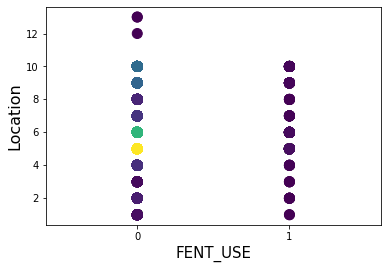

In [26]:
# scatterplot of location and fentynal use, with the colour of the dot representing the number of selections
x=ca['FENT_USE']
y=ca['DEM_LOCATION']
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
plt.xticks([0, 1]) # restrict x label to 0 and 1
plt.margins(x=0.6) # set inner paddings in the x direction
plt.scatter(x, y, c=z, s=100) # draw scatter plot
plt.xlabel('FENT_USE', fontsize=15)
plt.ylabel('Location', fontsize=16)
plt.show()

In [27]:
# create a list of col headings and restrict to those about drug uses
drugs=ca.columns.tolist()[26:57]
print(drugs)

# clean the list to only containing col headings of questions about whether the drugs are used or not
drugUse = []
for i in range(len(drugs)):
    if ('USE' in drugs[i]):
        drugUse.append(drugs[i])
print(drugUse)

# clean the list to only containing col headings of questions about whether the drugs are used under prescription
drugNmu = []
for i in range(len(drugs)):
    if ('NMU' in drugs[i]):
        drugNmu.append(drugs[i])
print(drugNmu)

['FENT_USE', 'FENT_NMU', 'BUP_USE', 'BUP_NMU', 'METH_USE', 'METH_NMU', 'MORPH_USE', 'MORPH_NMU', 'OXY_USE', 'OXY_NMU', 'OXYM_USE', 'OXYM_NMU', 'TRAM_USE', 'TRAM_NMU', 'TAP_USE', 'TAP_NMU', 'COD_USE', 'COD_NMU', 'COTC_NMU', 'HYD_USE', 'HYD_NMU', 'HYDM_USE', 'HYDM_NMU', 'SUF_USE', 'SUF_NMU', 'STIM_USE', 'STIM_NMU', 'BENZ_USE', 'BENZ_NMU', 'THC_USE', 'THC_NMU']
['FENT_USE', 'BUP_USE', 'METH_USE', 'MORPH_USE', 'OXY_USE', 'OXYM_USE', 'TRAM_USE', 'TAP_USE', 'COD_USE', 'HYD_USE', 'HYDM_USE', 'SUF_USE', 'STIM_USE', 'BENZ_USE', 'THC_USE']
['FENT_NMU', 'BUP_NMU', 'METH_NMU', 'MORPH_NMU', 'OXY_NMU', 'OXYM_NMU', 'TRAM_NMU', 'TAP_NMU', 'COD_NMU', 'COTC_NMU', 'HYD_NMU', 'HYDM_NMU', 'SUF_NMU', 'STIM_NMU', 'BENZ_NMU', 'THC_NMU']


In [28]:
# create a list of the number of drug uses for each type of drugs
drugUsage=[]
for i in range(len(drugUse)):
    drugUsage.append(ca[drugUse[i]].sum())
drugUsage

[349, 173, 220, 2038, 1567, 239, 750, 94, 7081, 781, 1117, 199, 488, 1952, 250]

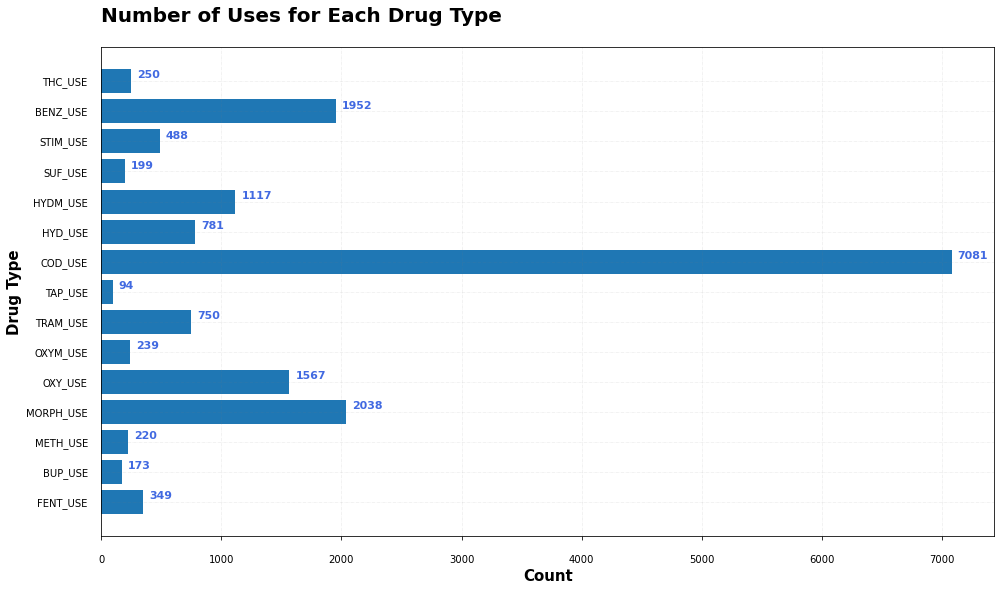

In [49]:
# draw horizontal bar graph of the number of drug uses for each type of drugs

fig, ax = plt.subplots(figsize =(16, 9)) # Figure Size
ax.barh(drugUse, drugUsage) # draw horizontal bar graph
ax.yaxis.set_ticks_position('none') # Remove y Ticks

# set x, y labels
plt.xlabel('Count', fontweight ='bold', fontsize = 15)
plt.ylabel('Drug Type', fontweight ='bold', fontsize = 15)

# add padding between axes and labels
ax.xaxis.set_tick_params(pad = 15)
ax.yaxis.set_tick_params(pad = 10)

# add x, y gridlines
ax.grid(b = True, color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.2)

# add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+50, i.get_y()+0.5, str(round((i.get_width()), 2)),
             fontsize = 11, fontweight ='bold', color ='royalblue')
    
# add title
ax.set_title('Number of Uses for Each Drug Type', loc ='left', 
             fontweight='bold', fontsize = 20, pad=25)

plt.show()

In [50]:
# chi-square test of independence between gender (DEM_GENDER) and the use of fentanyl (FENT_USE, FENT_NMU)
# H0: there is no association between gender and fentanyl use
# Ha: there is association between gender and fentanyl use
# significance level = 0.05

# gender\fentanyl use  |  not used  |  used with prescription  |  used without prescription  |  total
#                      |   (0, -)   |         (1, 0)           |           (1, 1)            |
# ------------------------------------------------------------------------------------------------------
#       male           |            |                          |                             |
# ------------------------------------------------------------------------------------------------------
#       female         |            |                          |                             |
# ------------------------------------------------------------------------------------------------------
#       total          |            |                          |                             |

# create list of counts corresponding to the drug use headings in the above table
fentanyl = [n-ca['FENT_USE'].sum(), int(ca['FENT_USE'].sum()-ca['FENT_NMU'].sum()), int(ca['FENT_NMU'].sum())]
print(fentanyl)

# create list of counts of gender
gender = [int(ca.loc[ca['DEM_GENDER'] == 1, 'DEM_GENDER'].sum()), int(ca.loc[ca['DEM_GENDER'] == 2, 'DEM_GENDER'].sum()/2)]
print(gender)

# create a 2x3 list of observed values corresponding to the above table
genderFentanylObserved = [[ca.loc[(ca['DEM_GENDER'] == 1) & (ca['FENT_USE'] == 0), 'FENT_USE'].count(), 
                           ca.loc[(ca['DEM_GENDER'] == 1) & (ca['FENT_NMU'] == 0), 'FENT_NMU'].count(), 
                           ca.loc[(ca['DEM_GENDER'] == 1) & (ca['FENT_NMU'] == 1), 'FENT_NMU'].count()],
                          [ca.loc[(ca['DEM_GENDER'] == 2) & (ca['FENT_USE'] == 0), 'FENT_USE'].count(), 
                           ca.loc[(ca['DEM_GENDER'] == 2) & (ca['FENT_NMU'] == 0), 'FENT_NMU'].count(), 
                           ca.loc[(ca['DEM_GENDER'] == 2) & (ca['FENT_NMU'] == 1), 'FENT_NMU'].count()]]
print(genderFentanylObserved)

# create a 2x3 list of expected values corresponding to the above table
genderFentanylExpected = []
for i in range(len(gender)):
    new=[]
    for j in range(len(fentanyl)):
        new.append(gender[i]*fentanyl[j]/n)
    genderFentanylExpected.append(new)
print(genderFentanylExpected)

#calculate the chi-square value
chisq = 0
for i in range(len(gender)):
    for j in range(len(fentanyl)):
        chisq += (genderFentanylObserved[i][j] - genderFentanylExpected[i][j]) * (genderFentanylObserved[i][j] - genderFentanylExpected[i][j]) / genderFentanylExpected[i][j]
print(chisq)

# degree of freedom = (number of col - 1) * (number of row - 1)
df = 2

# calculate p-value
pValue = 1 - stats.chi2.cdf(chisq, df)
print('p-value: ', pValue)

[9658, 299, 50]
[5005, 5002]
[[4830, 142, 33], [4828, 157, 17]]
[[4830.447686619366, 149.54481862696113, 25.00749475367243], [4827.552313380634, 149.45518137303887, 24.99250524632757]]
5.8720236829296315
p-value:  0.053076986630608114


In [51]:
# create a function that returns the p-value resulting from the chi-square test of independence between gender (DEM_GENDER) 
# and the use of drugs (drugUSE, drugNMU)
# H0: there is no association between gender and durg use
# Ha: there is association between gender and drug use
# significance level = 0.05

# gender\drug use  |  not used  |  used with prescription  |  used without prescription  |  total
#                  |   (0, -)   |         (1, 0)           |           (1, 1)            |
# ---------------------------------------------------------------------------------------------------
#       male       |            |                          |                             |
# ---------------------------------------------------------------------------------------------------
#       female     |            |                          |                             |
# ---------------------------------------------------------------------------------------------------
#       total      |            |                          |                             |

def independence_test(drugUSE, drugNMU):
    
    # create list of counts corresponding to the drug use headings in the above table
    drug = [n-ca[drugUSE].sum(), int(ca[drugUSE].sum()-ca[drugNMU].sum()), int(ca[drugNMU].sum())]
    #print(drug)

    # create list of counts of gender
    gender = [int(ca.loc[ca['DEM_GENDER'] == 1, 'DEM_GENDER'].sum()), int(ca.loc[ca['DEM_GENDER'] == 2, 'DEM_GENDER'].sum()/2)]
    #print(gender)

    # create a 2x3 list of observed values corresponding to the above table
    genderDrugObserved = [[ca.loc[(ca['DEM_GENDER'] == 1) & (ca[drugUSE] == 0), drugUSE].count(), 
                               ca.loc[(ca['DEM_GENDER'] == 1) & (ca[drugNMU] == 0), drugNMU].count(), 
                               ca.loc[(ca['DEM_GENDER'] == 1) & (ca[drugNMU] == 1), drugNMU].count()],
                              [ca.loc[(ca['DEM_GENDER'] == 2) & (ca[drugUSE] == 0), drugUSE].count(), 
                               ca.loc[(ca['DEM_GENDER'] == 2) & (ca[drugNMU] == 0), drugNMU].count(), 
                               ca.loc[(ca['DEM_GENDER'] == 2) & (ca[drugNMU] == 1), drugNMU].count()]]
    #print(genderDrugObserved)

    # create a 2x3 list of expected values corresponding to the above table
    genderDrugExpected = []
    for i in range(len(gender)):
        new=[]
        for j in range(len(drug)):
            new.append(gender[i]*drug[j]/n)
        genderDrugExpected.append(new)
    #print(genderDrugExpected)

    #calculate the chi-square value
    chisq = 0
    for i in range(len(gender)):
        for j in range(len(drug)):
            chisq += (genderDrugObserved[i][j] - genderDrugExpected[i][j]) * (genderDrugObserved[i][j] - genderDrugExpected[i][j]) / genderDrugExpected[i][j]
    #print(chisq)

    # calculate p-value
    pValue = 1 - stats.chi2.cdf(chisq, df)
    #print('p-value: ', pValue)
    return (1 - stats.chi2.cdf(chisq, 2))

In [52]:
# iterate over the the function with the list of drugs to generate a list of all p-values resulting from the chi-square test 
# of independence between gender and drug use
pValues = []
for i in range(len(drugUse) - 1):
    if (i < 8):
        pValues.append(independence_test(drugUse[i], drugNmu[i]))
        print(drugUse[i], ", ", drugNmu[i])
    else:
        pValues.append(independence_test(drugUse[i+1], drugNmu[i+2]))
        print(drugUse[i+1], ", ", drugNmu[i+2])
print(pValues)

FENT_USE ,  FENT_NMU
BUP_USE ,  BUP_NMU
METH_USE ,  METH_NMU
MORPH_USE ,  MORPH_NMU
OXY_USE ,  OXY_NMU
OXYM_USE ,  OXYM_NMU
TRAM_USE ,  TRAM_NMU
TAP_USE ,  TAP_NMU
HYD_USE ,  HYD_NMU
HYDM_USE ,  HYDM_NMU
SUF_USE ,  SUF_NMU
STIM_USE ,  STIM_NMU
BENZ_USE ,  BENZ_NMU
THC_USE ,  THC_NMU
[0.053076986630608114, 0.06884975754720557, 0.00010956664061745336, 0.0001949480520313518, 0.005090166865272527, 8.892203072763394e-07, 1.2418288543036837e-06, 0.0677352001727678, 0.10224487289178541, 6.001589766491122e-06, 0.33370968016085145, 0.2867058521271293, 0.0, 0.42088308496001847]


In [ ]:
# according to the resulting p-values, a further analysis can be performed about the relationship between the variables